In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression as ols

In [2]:
Boston = pd.read_csv('../Data/Boston.csv')

In [3]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
model1 = smf.OLS(Boston.medv, sm.add_constant(Boston.lstat))
res1 = model1.fit()

In [6]:
# aside, this is sweet a sweet way to directly download R datasets
# b = sm.datasets.get_rdataset('Boston',package='MASS')

In [12]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 22 Mar 2016   Prob (F-statistic):           5.08e-88
Time:                        21:24:01   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000        33.448    35.659
lstat         -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
dir(res1)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',
 'mse_model',
 'mse_resid',
 'mse_total',

In [16]:
# retrieving the models fitted parameters
res1.params

const    34.553841
lstat    -0.950049
dtype: float64

In [20]:
res1.conf_int(0.05)

,0,1
const,33.448457,35.659225
lstat,-1.026148,-0.873951


In [36]:
# this gives prediction intervals, NOT confidence intervals.
# if you know how to get the confidence intervals please share
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(res1)
new_exog1 = sm.add_constant(pd.DataFrame({'lstat': [5 ,10 ,15]}))
prstd, iv_l, iv_u  = wls_prediction_std(res1, exog=new_exog1)
b = pd.DataFrame({'prstd': prstd, 'iv_l': iv_l, 'iv_u': iv_u})
print(b)

        iv_l       iv_u     prstd
0  17.565675  42.041513  6.228957
1  12.827626  37.279068  6.222748
2   8.077742  32.528459  6.222563


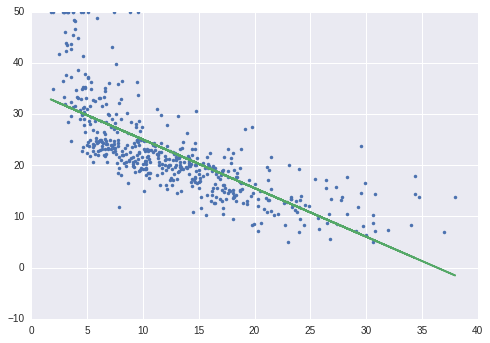

In [41]:
plt.plot(Boston.lstat, Boston.medv, '.')
plt.plot(Boston.lstat, res1.fittedvalues)

In [42]:
# for examples of goodness of fit plots see
# http://statsmodels.sourceforge.net/stable/graphics.html
# and my plotFit.py which (poorly) attempts to recreate the plot(fit) R functionality

In [30]:
# if you want me to finish up this lab let me konw, I ran out of allotted time on it.

        iv_l       iv_u     prstd
0  17.565675  42.041513  6.228957
1  12.827626  37.279068  6.222748
2   8.077742  32.528459  6.222563


In [31]:
b.iv_u - b.iv_l

0    24.475839
1    24.451442
2    24.450717
dtype: float64